# US Personal Medical Insurance - Regional Analysis

As mentioned in the [README](./README.md), the goal of this project quantify the impact of regional factors on insurance charges and to identify if certain regions are more prone to higher charges and why. As such, I have identified 3 different analyses that will help me achieve this goal:

1. Descriptive Statistics - This will help to identify the differences of insurances costs between regions.
2. Correlation Analysis - This will help to understand the correlation between other variables and their effect on insurance charges between each region.
3. Inferential Analyses - This will allow me to get an understanding as to whether or not information discovered by the two prior subsequent analyses can be used to make inferences on the general population. If a particular variable or set of variables has an effect on the charges on the general population, and said variable/s are more prevalent in a particular region, it may help to identify potential causes.

First, however, I must import and prepare the dataset.

## Importing the data

In order to import the data for analysis, I will be using the pandas `read_csv()` function to read my csv file as a `DataFrame` object:

In [28]:
# Import pandas library
import pandas as pd

# Import dataset
df = pd.read_csv("./data/dataset/insurance.csv")


Next, to prepare the data, I will simply separate the `DataFrame` into 4 separate `DataFrame` for each region:

In [29]:
# Create regional DataFrames
nw_df = df[df['region'] == 'northwest']
ne_df = df[df['region'] == 'northeast']
sw_df = df[df['region'] == 'southwest']
se_df = df[df['region'] == 'southeast']

## Descriptive Statistics

Now, I will get descriptive statistics for each region in the dataset. In order to be thorough, I would like to investigate information regarding the the costs for each region first, then I will dive into information about other variables that may affect the costs. As such, I will visualize these calculations:

1. Mean insurance cost per region.
2. Distribution of insurance costs per region.
3. Mean age per region.
4. Mean number of children per region.
5. Proportion smokers to non smokers per region.
6. Mean BMI per region.

First, however, I will need to import the correct packages:

In [30]:
import matplotlib.pyplot as plt

### Mean Insurance Cost per Region

This will provide me with information on regional differences between insurance costs. This will allow me to identify if such a disparity in insurance costs exists, and by how much. After this, I can further investigate as to why such a disparity may be occurring.

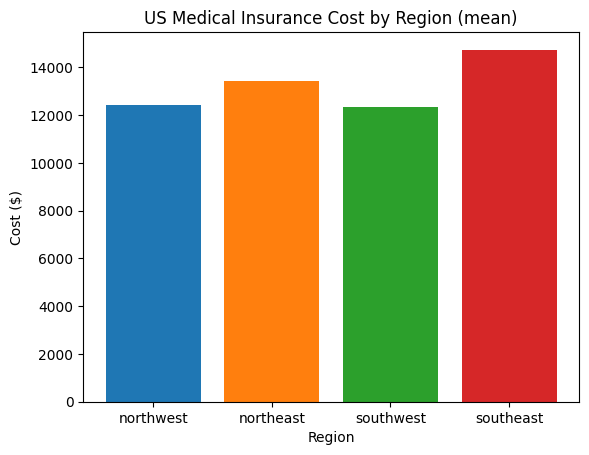

In [31]:
# Calculate mean insurance costs
nw_mean_cost = nw_df.charges.mean()
ne_mean_cost = ne_df.charges.mean()
sw_mean_cost = sw_df.charges.mean()
se_mean_cost = se_df.charges.mean()

mean_costs = [nw_mean_cost, ne_mean_cost, sw_mean_cost, se_mean_cost]
regions = ["northwest", "northeast", "southwest", "southeast"]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
# Plot mean values
plt.bar(regions, mean_costs, color=colors)
plt.title("US Medical Insurance Cost by Region (mean)")
plt.xlabel("Region")
plt.ylabel("Cost ($)")
plt.savefig("./data/visualizations/descriptive/regional_mean_cost.png")
plt.show()

It appears that there is a disparity. The southeastern and northeastern regions of the US have larger mean insurance costs than the northwest and southwest regions. The southeastern region of the US has the largest of the average costs, followed by northeast. The northwest and southwestern regions are fairly similar, but it appears that the northwestern region has a slightly higher average cost.

### Distribution of Insurance Costs per Region

Now that I have identified a regional disparity in costs, I will look into the distribution of costs per region. To do this, I will use box plots. Visualizing this information will allow me to identify potential outliers in the costs that are affecting the mean values.

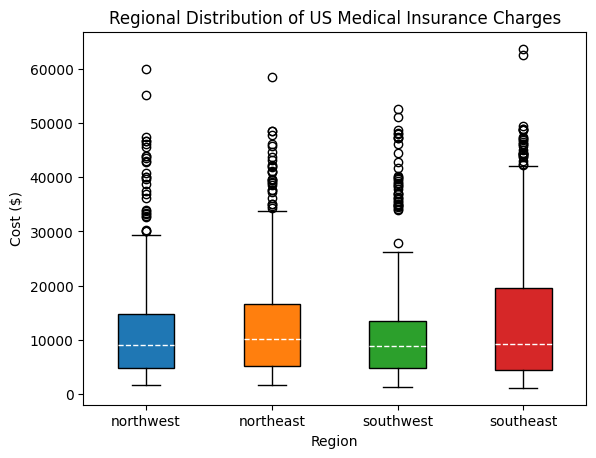

In [32]:
# Retrieve costs
nw_costs = nw_df.charges
ne_costs = ne_df.charges
sw_costs = sw_df.charges
se_costs = se_df.charges

costs = [nw_costs, ne_costs, sw_costs, se_costs]
regions = ["northwest", "northeast", "southwest", "southeast"]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

props = {
        'linestyle': 'dashed',
        'color': 'white'
        }

# Get subplot axes
bplot = plt.boxplot(costs, labels=regions, patch_artist=True, medianprops=props)

for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)

plt.tight_layout(pad=3.0, w_pad=2.0, h_pad=2.0)
plt.title("Regional Distribution of US Medical Insurance Charges")
plt.xlabel("Region")
plt.ylabel("Cost ($)")
plt.savefig("./data/visualizations/descriptive/regional_cost_distribution.png")
plt.show()

These boxplots serve to further highlight regional differences between the medical insurance charges. Here is what I identified for each:

- **Northwest**: The boxplot indicates that the insurance charges are relatively lower and tightly distributed. This suggests less variation in charges within this region, with fewer outliers than the other regions.

- **Northeast**: The median charge in the northeast is higher than that of the northwest and southwest. There is a moderate number of outliers, indicating that some individuals have significantly higher charges. The distribution is broader than the northwest, suggesting more variability.

- **Southwest**: This region shows a distribution similar to the northwest, with a slightly higher median. There are some high-cost outliers, but not as many as in the southeast.

- **Southeast**: The most striking feature is the number of high-cost outliers, which are substantially more than in any other region. The median cost is the highest among the four regions, and the spread of the central box is also wide, indicating significant variability in charges.

### Mean Age Per Region

Now, it's time to start looking into other differences between the regions. This will help me to identify any potential differences which may be indicative as to why the northeastern and southeastern regions have higher average costs.

[39.19692307692308, 39.26851851851852, 39.45538461538462, 38.93956043956044]


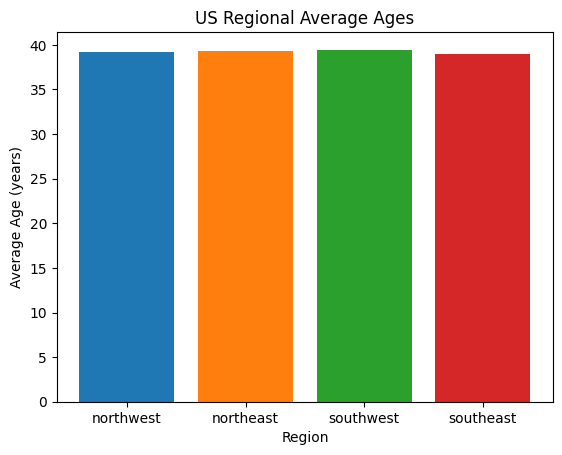

In [33]:
# Prepare data
nw_age = nw_df.age.mean()
ne_age = ne_df.age.mean()
sw_age = sw_df.age.mean()
se_age = se_df.age.mean()

ages = [nw_age, ne_age, sw_age, se_age]
regions = ["northwest", "northeast", "southwest", "southeast"]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']
print(ages)

# Plot mean values
plt.bar(regions, ages, color=colors)
plt.title("US Regional Average Ages")
plt.xlabel("Region")
plt.ylabel("Average Age (years)")
plt.savefig("./data/visualizations/descriptive/regional_mean_age.png")
plt.show()

It seems that for each region, the mean age is approximately 39 years old. There doesn't appear to be any significant differences in this variable that would indicate as to why the mean costs in the northeastern and southeastern regions are higher.

### Mean Number of Children Per Region

Again, I will be using a simple bar plot for this variable. It will allow me to identify if the number of children people have in a particular region may be in someway tied to the average cost in that region.

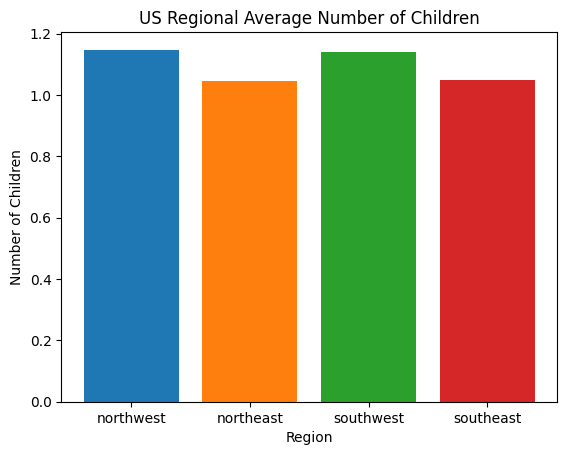

In [34]:
# Prepare data
nw_bmi = nw_df.children.mean()
ne_bmi = ne_df.children.mean()
sw_bmi = sw_df.children.mean()
se_bmi = se_df.children.mean()

n_children = [nw_bmi, ne_bmi, sw_bmi, se_bmi]
regions = ["northwest", "northeast", "southwest", "southeast"]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

# Plot mean values
plt.bar(regions, n_children, color=colors)
plt.title("US Regional Average Number of Children")
plt.xlabel("Region")
plt.ylabel("Number of Children")
plt.savefig("./data/visualizations/descriptive/regional_mean_n_children.png")
plt.show()

Ok, this is really interesting. It seems that in the regions with higher average medical insurance costs, they are typically having few children. I can't determine if the number of children is pushing down medical insurance costs, or if fewer people are having more children due to their medical insurance costs. Or perhaps, another variable may be affecting both of these variables. Of course, that's if the correlation is not spurious. It may be worth looking into this further.

### Proportion of Smokers by Region

It's assumed that smoking will have a significant impact on ones insurance costs. If the southeastern and northeastern regions have higher proportions of smokers, it may indicate why these two regions have higher average insurance costs.

smoker
no     0.821538
yes    0.178462
Name: proportion, dtype: float64


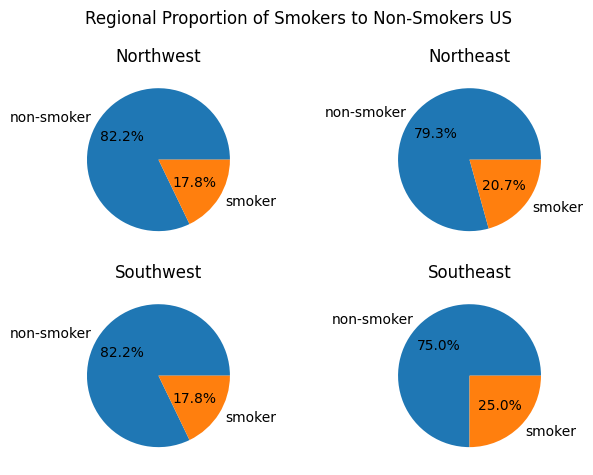

In [35]:
# Prepare data
nw_smokers = nw_df.smoker.value_counts(normalize=True)
ne_smokers = ne_df.smoker.value_counts(normalize=True)
sw_smokers = sw_df.smoker.value_counts(normalize=True)
se_smokers = se_df.smoker.value_counts(normalize=True)

print(sw_smokers)

# Plot
fig, ax = plt.subplots(2, 2)
nw_ax = ax[0,0]
ne_ax = ax[0,1]
sw_ax = ax[1,0]
se_ax = ax[1,1]

nw_ax.pie(nw_smokers, labels=["non-smoker", "smoker"], autopct="%1.1f%%")
nw_ax.set_title("Northwest")

ne_ax.pie(ne_smokers, labels=["non-smoker", "smoker"], autopct="%1.1f%%")
ne_ax.set_title("Northeast")

sw_ax.pie(sw_smokers, labels=["non-smoker", "smoker"], autopct="%1.1f%%")
sw_ax.set_title("Southwest")

se_ax.pie(se_smokers, labels=["non-smoker", "smoker"], autopct="%1.1f%%")
se_ax.set_title("Southeast")

fig.suptitle("Regional Proportion of Smokers to Non-Smokers US")

plt.tight_layout()
plt.savefig("./data/visualizations/descriptive/regional_smokers_to_non_smokers.png")
plt.show()

Now, this is another descriptive statistic that gives us a potential reason why the northeastern and southeastern regions have higher average medical insurance costs. The number of smokers in these regions is proportionally greater than in the north and southwestern regions.

### Average BMI Per Region

As we have the BMI variable, it would only make sense to use this to identify potential reasons why the Northeastern and Southeastern regions have higher average insurance costs, too. BMI is a score to indicate a persons weight relative to their height. It helps medical insurance companies to identify individuals who may be at greater risk of adverse health due to being either over or underweight.

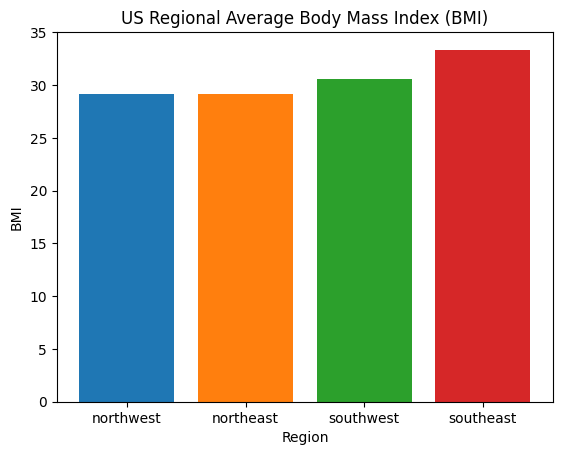

In [36]:
# Prepare data
nw_bmi = nw_df.bmi.mean()
ne_bmi = ne_df.bmi.mean()
sw_bmi = sw_df.bmi.mean()
se_bmi = se_df.bmi.mean()

n_children = [nw_bmi, ne_bmi, sw_bmi, se_bmi]
regions = ["northwest", "northeast", "southwest", "southeast"]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red']

# Plot mean values
plt.bar(regions, n_children, color=colors)
plt.title("US Regional Average Body Mass Index (BMI)")
plt.xlabel("Region")
plt.ylabel("BMI")
plt.savefig("./data/visualizations/descriptive/regional_mean_bmi.png")
plt.show()

It appears that the southeastern region has a particularly higher average BMI than the rest of the US. With the added effect of smoking, it is really helping to see potential reasons as to why the region has by-far the highest average medical insurance cost. However, it should be noted that the northeast, the second highest average medical insurance cost, does not follow this trend.

### Descriptive Statistics - Summary

To summarize my findings on analyzing the descriptive statistics in regional data, the northeastern and southeastern regions have the second highest, and highest average medical insurance costs respectively. The average age for all regions is fairly similar, at approximately 39 for every region. However, the southeastern and northeastern regions have fewer children, but higher average BMI's and a larger proportion of smokers to non-smokers.

## Correlation Statistics

To further solidify my suspicions that the `smoker`, `children` and `bmi` variables are in someway indicative of the cost of medical insurance, I will conduct two correlative analyses:

1. A heatmap to show relational patterns between these variables and the `charges` variable.
2. Scatter plots with linear fit, to see how charges change with different values for continuous variables.

### Heatmap

The heatmap will allow me to identify how important different pairs of variables are in predicting the `charges` variable. This will help me to identify the two most significant attributes that might determine the charges an individual receives on their medical bill.

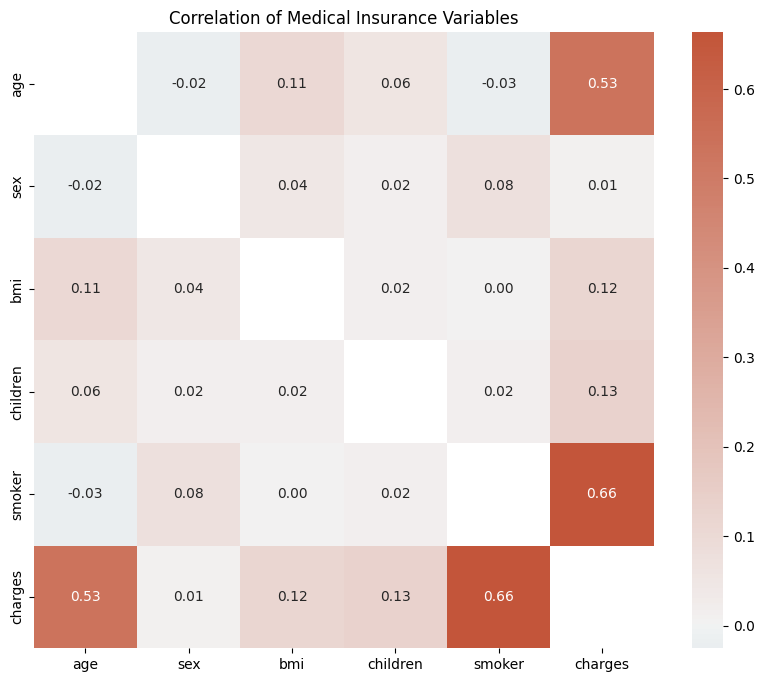

In [37]:
import seaborn as sns
import numpy as np

def numerate_sex(sex):
    if sex == "male":
        return 1
    else:
        return 0
    
def numerate_smoker(smoker):
    if smoker == "yes":
        return 1
    else:
        return 0

no_region_df = df.drop("region", axis=1)
no_region_df.sex = no_region_df.sex.apply(numerate_sex)
no_region_df.smoker = no_region_df.smoker.apply(numerate_smoker)

# Calculate the correlation matrix
corr = no_region_df.corr(method="spearman")
mask = np.zeros_like(corr, dtype=bool)
np.fill_diagonal(mask, True)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, mask=mask, center=0, robust=True, annot=True, fmt=".2f", cmap=sns.diverging_palette(220, 20, as_cmap=True), cbar=True)
plt.title("Correlation of Medical Insurance Variables")
plt.savefig("./data/visualizations/correlative/heatmap.png")
plt.show()

From this heatmap, it's very easy to identify which variables in our dataset effect the `charges` variable, and by how much. The most significant hear is the `smoker` variable. However, it doesn't seem that `children` and `bmi` affect the `charges` by anywhere near the amount I had believed. On the other hand, `age` also is indicative to nearly the same extent as `smoker`, or a higher `charges` value. This is signifcant, but is unlikely to explain the likeliness of one region having particularly higher medical insurance costs, as the mean age for each region is approximately the same.

### Scatter Plot

Here, I will visualize the nature of relationship between continuous variables and the `charges` variable, to better understand the nature of the relationship between them.

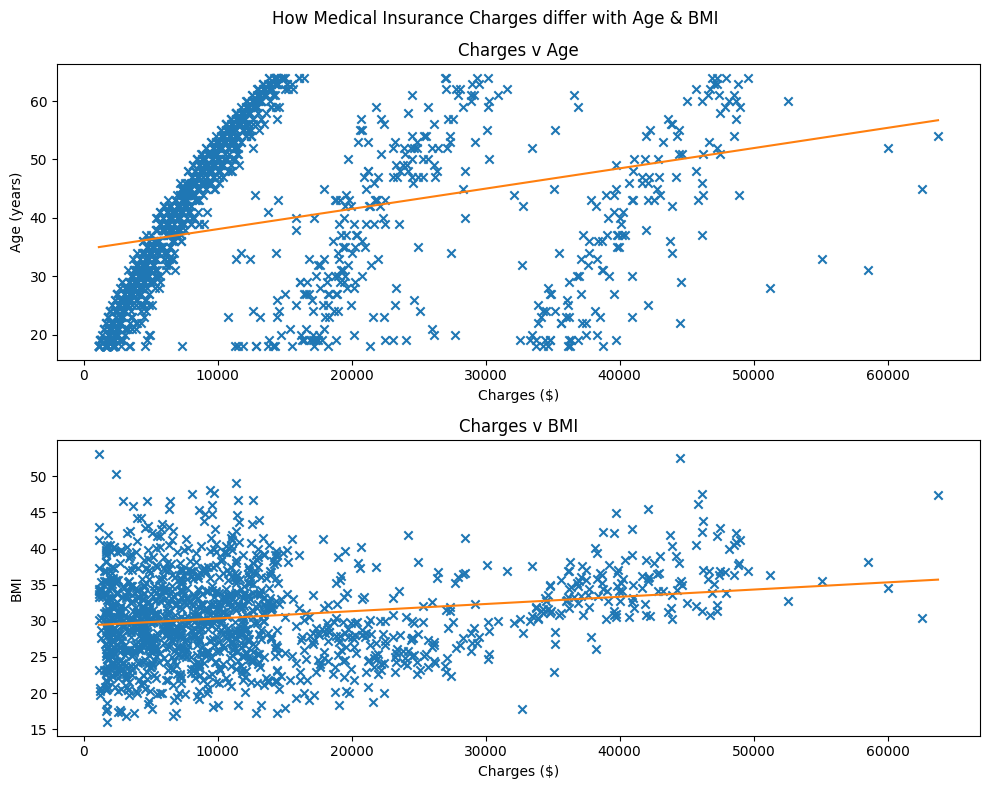

In [38]:

charges = df.charges.to_list()
n_children = df.children.to_list()
age = df.age.to_list()
bmi = df.bmi.to_list()

# plot
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
age_ax = ax[0]
bmi_ax = ax[1]


age_ax.scatter(charges, age, marker="x")
age_ax.plot(np.unique(charges), np.poly1d(np.polyfit(charges, age, 1))(np.unique(charges)), color="tab:orange")
age_ax.set_title("Charges v Age")
age_ax.set_xlabel("Charges ($)")
age_ax.set_ylabel("Age (years)")
bmi_ax.scatter(charges, bmi, marker="x")
bmi_ax.plot(np.unique(charges), np.poly1d(np.polyfit(charges, bmi, 1))(np.unique(charges)), color="tab:orange")
bmi_ax.set_title("Charges v BMI")
bmi_ax.set_xlabel("Charges ($)")
bmi_ax.set_ylabel("BMI")
fig.suptitle("How Medical Insurance Charges differ with Age & BMI")
plt.tight_layout()
plt.savefig("./data/visualizations/correlative/charges_v_bmi_v_age.png")
plt.show()

It's clear that both BMI and Age have a correlation with the `Charges` variable. However, a persons age is a significantly more important factor in determining ones medical insurance charge.

### Summary

It's clear from the correlative analysis that whether or not someone smokes has a significantly strong relationship with how much they are expected to pay on their medical bill. This appears to indicate an apparent reason why the northeastern and southeaster regions of the US pay higher medical insurance rates on average: because they have a higher proportion of smokers.

## Inferential Analysis

Now that I have identified a strong correlation between whether or not someone smokes and the charges they endure, I will conduct an inferential analysis on smoking over the entire dataset. If smoking is genuinely an indicator that someone faces increased charges when chosen at random in representative samples, this would indicate that smoking is the likely reason that the northeastern and southeastern regions of the US have higher mean medical insurance bills because of this. In order to do this, I will conduct a two-sample t-test.

### Two-Sample T-Test

A Two-Sample T-Test, also known as an independent samples t-test, is a statistical method used to determine whether there is a significant difference between the means of two independent or unrelated groups. This test compares the means from two groups to see if they are statistically different from each other. In my circumstance, I will conduct a sample from smokers and non-smokers, and compare the means of both to identify whether or not there is a significant difference in the mean charges of smokers and the mean charges of non-smokers. This will allow me to infer that smokers face higher medical insurance charges as a result of their smoking status.

T-statistic: 32.751887766341824
P-value: 5.88946444671698e-103
5 5


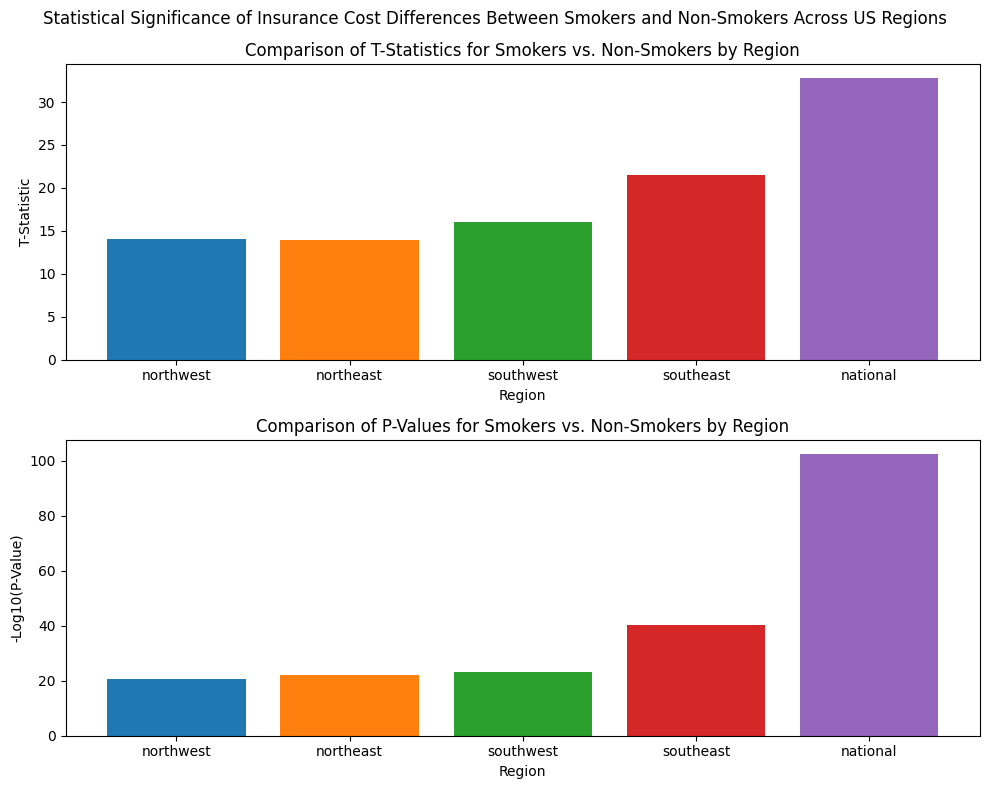

In [39]:
from scipy import stats

# Separate the dataset into smokers and non-smokers
smokers = df[df['smoker'] == 'yes']
non_smokers = df[df['smoker'] == 'no']

# Perform a two-sample t-test
t_stat, p_val = stats.ttest_ind(smokers['charges'], non_smokers['charges'], equal_var=False)

# Display the test statistic and p-value
print("T-statistic:", t_stat)
print("P-value:", p_val)

# To focus on regions, perform the t-test for northeast and southeast regions
regions = ["northwest", "northeast", "southwest", "southeast"]
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', "tab:purple"]

t_stats = []
p_vals = []
for region in regions:
    region_smokers = df[(df['smoker'] == 'yes') & (df['region'] == region)]
    region_non_smokers = df[(df['smoker'] == 'no') & (df['region'] == region)]

    t_stat_region, p_val_region = stats.ttest_ind(region_smokers['charges'], region_non_smokers['charges'], equal_var=False)
    t_stats.append(t_stat_region)
    p_vals.append(p_val_region)

t_stats.append(t_stat)
p_vals.append(p_val)

regions = ["northwest", "northeast", "southwest", "southeast", "national"]

print(len(t_stats), len(regions))
# Start of the plotting code
fig, ax = plt.subplots(2, 1, figsize=(10, 8))

# T-statistic subplot
t_ax = ax[0]
t_ax.bar(regions, t_stats, color=colors)
t_ax.set_title("Comparison of T-Statistics for Smokers vs. Non-Smokers by Region")
t_ax.set_xlabel("Region")
t_ax.set_ylabel("T-Statistic")

# P-value subplot
p_ax = ax[1]
p_ax.bar(regions, [-np.log10(p) for p in p_vals], color=colors)  # -log10 transform for better visualization
p_ax.set_title("Comparison of P-Values for Smokers vs. Non-Smokers by Region")
p_ax.set_xlabel("Region")
p_ax.set_ylabel("-Log10(P-Value)")

# Overall figure title
fig.suptitle("Statistical Significance of Insurance Cost Differences Between Smokers and Non-Smokers Across US Regions")

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()

# Save and show the plot
plt.savefig("./data/visualizations/inferential/regional_smoker_t_stats.png")
plt.show()

The provided bar charts illustrate the results of t-statistics and corresponding p-values for a two-sample t-test comparing insurance costs between smokers and non-smokers across various US regions, as well as a national average.

Each region, as well as the national data, shows a substantial t-statistic, which indicates a significant difference in medical insurance costs between smokers and non-smokers. The purple bar representing the national data stands out as particularly high, which suggests a strong nationwide effect of smoking status on insurance costs.

The p-values have been transformed using the negative log10 scale for better visibility. A higher bar represents a smaller p-value, indicating stronger evidence against the null hypothesis (which would typically posit no difference in insurance costs between the groups). All regions, including the national data, show very high bars, corresponding to extremely low p-values, far below the typical alpha level of 0.05 used to infer statistical significance.

In summary, the analysis provides robust statistical evidence that smokers have higher medical insurance costs compared to non-smokers, and this pattern is consistent across all regions examined as well as nationally. The p-value chart underscores the statistical significance of these findings across the board.

## Conclusion

From the analyses conducted, it seems that two regions in particular have far higher average medical insurance bills: the southeast and the northeast, with the southeast by far having the highest average bill. Upon investigating the regional differences between the regions, it became apparent that the northeastern and southeastern regions had significantly higher proportions of smokers than the northwestern and southwestern regions.

An analysis into the correlations between different variables in the dataset indicated that smoking was by far the most significant variable in indicating a higher medical insurance cost. If the proportion of smokers in the northeastern and southeastern regions was higher than the northwestern and southwestern regions, and smoking was strongly correlated with higher medical insurance costs, it seems like smoking was likely the cause for higher average medical insurance bills in these regions.

In order to solidify this hypothesis, a Two-Sample T-Test was conducted on all regions of the dataset individually, as well as the entire dataset as a whole. This was done to make an inference that smoking led to higher medical insurance bills, and thus was potentially the cause for higher average bills in the eastern regions. The results of the test significantly favoured the alternative hypothesis over the null hypothesis, with profoundly high t-statistics for each region, and nationally, and miniscule p-values across the board.

In the context of the aim of this analysis into U.S. regional, personal medical insurance analysis - this project quantify the impact of regional factors on insurance charges and to identify if certain regions are more prone to higher charges and why - broken into two questions, the answers can be given as so:

1. **What are the numerical differences in regional medical insurance charges?** - The southeast has the highest average medical insurance charge, followed by the northeast. Meanwhile, the northwest and southwest have approximately similar, and far smaller mean medical insurance charges.
2. **What regional differences in other variables exist that may infer a difference in medical insurance costs?** - From the analysis conducted, it seems abundantly clear that the most significant variable, by far, in determining why medical insurance in the southeast and northeastern United States is far higher than in the west is smoking. With proportionally higher number of smokers in both regions, than the west, and hypothesis and correlative analytics indicating a huge significance in smoking leading to higher medical insurance bills, it is highly likely that this is why the eastern regions have higher medical bills on average.

Based on the analysis conducted, here are suggestions for local governments, health insurance companies, and citizens:

**For Local Governments**:

- **Public Health Campaigns**: Increase public health campaigns to reduce smoking rates in the northeastern and southeastern regions. These campaigns could include smoking cessation programs, educational efforts highlighting the health and financial impacts of smoking, and more accessible support resources for those looking to quit.
- **Regulation and Taxation**: Consider regulations that limit smoking in public areas and higher taxation on tobacco products, as these measures are known to reduce smoking rates.
- **Healthcare Support**: Expand access to healthcare services that support smoking cessation, including counseling, medications, and support groups, especially in areas with higher smoking rates.

**For Health Insurance Companies**:

- **Incentive Programs**: Develop incentive programs for non-smokers or for members who successfully quit smoking. This could include reduced premiums or rewards for participation in smoking cessation programs.
Risk Assessment: Adjust risk assessment models to more accurately reflect the additional costs associated with insuring smokers, which might include considering regional smoking prevalence.
- **Preventative Programs**: Offer preventative care programs aimed at smoking cessation, which could reduce long-term medical costs by improving overall member health.
- **Customized Plans**: Create insurance plans tailored for smokers that include benefits for smoking cessation programs, regular health screenings, and wellness checkups to mitigate health risks.

**For Citizens**:

- **Smoking Cessation**: Individuals who smoke should seek out resources to help quit smoking, not only for health reasons but also to reduce insurance costs.
- **Education**: Citizens should educate themselves about the health risks of smoking and the impact it has on medical costs and insurance premiums.
Advocacy: Citizens can advocate for stricter anti-smoking laws and better healthcare support for smoking cessation in their communities.
- **Insurance Shopping**: Shop around for health insurance plans that reward non-smoking behavior or provide support for those trying to quit.

By addressing the issue of smoking through these multi-faceted approaches, there is potential for a significant impact on the health outcomes of the population, as well as a reduction in healthcare and insurance costs. This holistic strategy requires cooperation from various stakeholders to implement effective interventions that can lead to sustainable changes in smoking behaviors and healthcare costs.